### Import Libraries

In [1]:
import numpy
import pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #to override the default matplotlib settings

### Loading the data

In [2]:
raw_data = pandas.read_csv('2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


### Converting or mapping Yes to 1 and No to 0

In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


### We are predicting admission so the y-variable is Admitted column and the x-variable is the SAT

In [4]:
y = data['Admitted']
x1 = data['SAT']

### Creating a scatterplot

Text(0, 0.5, 'Admitted')

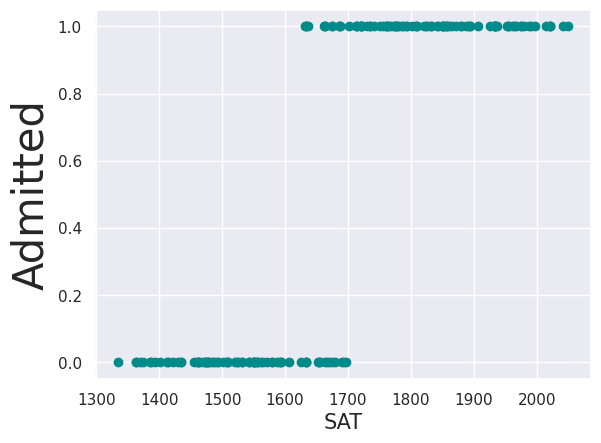

In [5]:
#The resulting scatterplot is because we are dealing with a yes or no
plt.scatter(x1,y,color='darkcyan')
plt.xlabel('SAT',fontsize=15)
plt.ylabel('Admitted',fontsize=30)

### Plotting with a regression line

/tmp/ipykernel_20150/2284285977.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_line.params[1] + results_line.params[0]


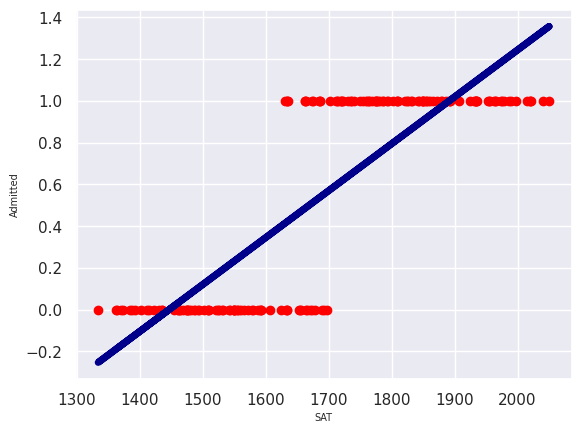

In [6]:
x = sm.add_constant(x1)
reg_line = sm.OLS(y,x)
results_line = reg_line.fit()

plt.scatter(x1,y, color='red')
y_hat = x1*results_line.params[1] + results_line.params[0]

plt.plot(x1,y_hat,lw=5,color='darkblue')
plt.xlabel('SAT',fontsize=7)
plt.ylabel('Admitted',fontsize=7)

plt.show()

### Regression

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Testing the model and assessiing its accuracy

In [8]:
test = pandas.read_csv('2.03.+Test+dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


### Mapping the variables

In [9]:
test['Admitted']=test['Admitted'].map({'Yes':1,'No':0})
test['Gender']=test['Gender'].map({'Female':1,'Male':0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


##### 1. We will use our model to make predictions based on the data test
##### 2. We will compare those with the actual outcome
##### 3. Calculate the accuracy
##### 4. Create a Confusion Matrix

In [10]:
x

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [11]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
# test_data = test_data[x.columns.values]
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0
